In [9]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '7c9a48f6-9a94-40ec-906b-f596d793b142',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-06-04T13:43:18.586Z', 'error_code': 0, 'error_message': None, 'elapsed': 34, 'credit_count': 1, 'notice': None, 'total_count': 10347}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10241, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [10]:
type(data)

dict

In [11]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [12]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.Timestamp('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10241,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.939254e+07,1.939254e+07,False,NaN,1,NaN,NaN,None,2023-06-04T13:41:00.000Z,27238.821751,8.895919e+09,-11.4325,0.104236,0.184055,0.058993,-6.361347,-4.034558,21.366985,5.282300e+11,45.9117,5.720153e+11,None,2023-06-04T13:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-04 20:43:23.191433
1,1027,Ethereum,ETH,ethereum,6967,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202361e+08,1.202361e+08,True,NaN,2,NaN,NaN,None,2023-06-04T13:41:00.000Z,1906.778657,3.412552e+09,-18.7950,0.083960,0.157978,3.363313,-1.200668,-0.150949,21.571998,2.292637e+11,19.9319,2.292637e+11,None,2023-06-04T13:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-04 20:43:23.191433
2,825,Tether,USDT,tether,55010,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.315249e+10,8.609064e+10,True,NaN,3,NaN,NaN,None,2023-06-04T13:41:00.000Z,1.000282,1.353836e+10,-12.0259,0.003343,-0.012082,-0.007336,-0.012289,0.021557,0.021917,8.317598e+10,7.2295,8.611495e+10,None,2023-06-04T13:41:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-04 20:43:23.191433
3,1839,BNB,BNB,bnb,1445,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558558e+08,1.558558e+08,False,NaN,4,NaN,NaN,None,2023-06-04T13:41:00.000Z,307.292282,2.499914e+08,-10.6904,0.167115,-0.034927,-0.196131,-5.538682,-2.452263,7.541262,4.789330e+10,4.1628,4.789330e+10,None,2023-06-04T13:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-04 20:43:23.191433
4,3408,USD Coin,USDC,usd-coin,12813,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.890943e+10,2.890943e+10,False,NaN,5,NaN,NaN,None,2023-06-04T13:41:00.000Z,0.999923,1.788371e+09,-15.0528,0.005472,-0.009422,-0.015521,-0.005164,0.023800,-0.023141,2.890720e+10,2.5126,2.890720e+10,None,2023-06-04T13:41:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-04 20:43:23.191433
5,52,XRP,XRP,xrp,959,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.198702e+10,9.998888e+10,False,NaN,6,NaN,NaN,None,2023-06-04T13:41:00.000Z,0.525986,5.648579e+08,-34.5136,0.302995,1.187702,11.249873,14.243899,3.082489,44.273728,2.734444e+10,2.3767,5.259859e+10,None,2023-06-04T13:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-04 20:43:23.191433
6,2010,Cardano,ADA,cardano,819,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.489413e+10,3.584278e+10,False,NaN,7,NaN,NaN,None,2023-06-04T13:41:00.000Z,0.380638,1.264389e+08,-2.8181,0.131809,1.191531,0.624088,-1.737275,-3.814670,14.449444,1.328203e+10,1.1547,1.712871e+10,None,2023-06-04T13:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-04 20:43:23.191433
7,74,Dogecoin,DOGE,dogecoin,718,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.396270e+11,1.396270e+11,True,NaN,8,NaN,NaN,None,2023-06-04T13:41:00.000Z,0.072826,1.178332e+08,-17.1484,0.092787,0.275103,0.485183,-7.021942,-24.848099,-1.762755,1.016853e+10,0.8838,1.016853e+10,None,2023-06-04T13:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-04 20:43:23.191433
8,5426,Solana,SOL,solana,468,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.969689

In [13]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)


    # Use this if you want to create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'D:\Documents\Python Scripts\API.csv'):
        df.to_csv(r'D:\Documents\Python Scripts\API.csv', header='column_names')
    else:
        df.to_csv(r'D:\Documents\Python Scripts\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')


In [14]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

C:\Users\Admin\AppData\Local\Temp\ipykernel_28480\679823367.py:31: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\Admin\AppData\Local\Temp\ipykernel_28480\679823367.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
C:\Users\Admin\AppData\Local\Temp\ipykernel_28480\679823367.py:37: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


C:\Users\Admin\AppData\Local\Temp\ipykernel_28480\679823367.py:31: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\Admin\AppData\Local\Temp\ipykernel_28480\679823367.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
C:\Users\Admin\AppData\Local\Temp\ipykernel_28480\679823367.py:37: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


C:\Users\Admin\AppData\Local\Temp\ipykernel_28480\679823367.py:31: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\Admin\AppData\Local\Temp\ipykernel_28480\679823367.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
C:\Users\Admin\AppData\Local\Temp\ipykernel_28480\679823367.py:37: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


C:\Users\Admin\AppData\Local\Temp\ipykernel_28480\679823367.py:31: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\Admin\AppData\Local\Temp\ipykernel_28480\679823367.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
C:\Users\Admin\AppData\Local\Temp\ipykernel_28480\679823367.py:37: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


C:\Users\Admin\AppData\Local\Temp\ipykernel_28480\679823367.py:31: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\Admin\AppData\Local\Temp\ipykernel_28480\679823367.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
C:\Users\Admin\AppData\Local\Temp\ipykernel_28480\679823367.py:37: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


C:\Users\Admin\AppData\Local\Temp\ipykernel_28480\679823367.py:31: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\Admin\AppData\Local\Temp\ipykernel_28480\679823367.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
C:\Users\Admin\AppData\Local\Temp\ipykernel_28480\679823367.py:37: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


C:\Users\Admin\AppData\Local\Temp\ipykernel_28480\679823367.py:31: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\Admin\AppData\Local\Temp\ipykernel_28480\679823367.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
C:\Users\Admin\AppData\Local\Temp\ipykernel_28480\679823367.py:37: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


KeyboardInterrupt: 

In [15]:
df72 = pd.read_csv(r'D:\Documents\Python Scripts\API.csv')
df72

,0,1,Bitcoin,BTC,bitcoin,10241,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'paradigm-portfolio', 'bitcoin-ecosystem']",21000000.0,19392543.0,19392543.0.1,False,Unnamed: 12,1.1,Unnamed: 14,Unnamed: 15,Unnamed: 16,2023-06-04T13:41:00.000Z,27238.821750521995,8895919113.31107,-11.4325,0.1042357,0.18405526,0.05899265,-6.36134737,-4.03455817,21.36698515,528230022066.33307,45.9117,572015256760.96,Unnamed: 30,2023-06-04T13:41:00.000Z.1,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,2023-06-04 13:43:27.467384
0,1,1027,Ethereum,ETH,ethereum,6967,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202361e+08,1.202361e+08,True,NaN,2,NaN,NaN,NaN,2023-06-04T13:41:00.000Z,1906.778657,3.412552e+09,-18.7950,0.083960,0.157978,3.363313,-1.200668,-0.150949,21.571998,2.292637e+11,19.9319,2.292637e+11,NaN,2023-06-04T13:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-04 13:43:27.467384
1,2,825,Tether,USDT,tether,55010,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.315249e+10,8.609064e+10,True,NaN,3,NaN,NaN,NaN,2023-06-04T13:41:00.000Z,1.000282,1.353836e+10,-12.0259,0.003343,-0.012082,-0.007336,-0.012289,0.021557,0.021917,8.317598e+10,7.2295,8.611495e+10,NaN,2023-06-04T13:41:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-04 13:43:27.467384
2,3,1839,BNB,BNB,bnb,1445,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.558558e+08,1.558558e+08,False,NaN,4,NaN,NaN,NaN,2023-06-04T13:41:00.000Z,307.292282,2.499914e+08,-10.6904,0.167115,-0.034927,-0.196131,-5.538682,-2.452263,7.541262,4.789330e+10,4.1628,4.789330e+10,NaN,2023-06-04T13:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-04 13:43:27.467384
3,4,3408,USD Coin,USDC,usd-coin,12813,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.890943e+10,2.890943e+10,False,NaN,5,NaN,NaN,NaN,2023-06-04T13:41:00.000Z,0.999923,1.788371e+09,-15.0528,0.005472,-0.009422,-0.015521,-0.005164,0.023800,-0.023141,2.890720e+10,2.5126,2.890720e+10,NaN,2023-06-04T13:41:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-04 13:43:27.467384
4,5,52,XRP,XRP,xrp,959,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.198702e+10,9.998888e+10,False,NaN,6,NaN,NaN,NaN,2023-06-04T13:41:00.000Z,0.525986,5.648579e+08,-34.5136,0.302995,1.187702,11.249873,14.243899,3.082489,44.273728,2.734444e+10,2.3767,5.259859e+10,NaN,2023-06-04T13:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-04 13:43:27.467384
5,6,2010,Cardano,ADA,cardano,819,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.489413e+10,3.584278e+10,False,NaN,7,NaN,NaN,NaN,2023-06-04T13:41:00.000Z,0.380638,1.264389e+08,-2.8181,0.131809,1.191531,0.624088,-1.737275,-3.814670,14.449444,1.328203e+10,1.1547,1.712871e+10,NaN,2023-06-04T13:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-04 13:43:27.467384
6,7,74,Dogecoin,DOGE,dogecoin,718,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.396270e+11,1.396270e+11,True,NaN,8,NaN,NaN,NaN,2023-06-04T13:41:00.000Z,0.072826,1.178332e+08,-17.1484,0.092787,0.275103,0.485183,-7.021942,-24.848099,-1.762755,1.016853e+10,0.8838,1.016853e+10,NaN,2023-06-04T13:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-04 13:43:27.467384

In [16]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10241,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.939254e+07,1.939254e+07,False,NaN,1,NaN,NaN,None,2023-06-04T13:48:00.000Z,27247.630224,8.938237e+09,-10.7067,0.109562,0.243527,0.207704,-6.583027,-3.899801,21.300002,5.284008e+11,45.9103,5.722002e+11,None,2023-06-04T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-04 13:49:30.455266
1,1027,Ethereum,ETH,ethereum,6967,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202361e+08,1.202361e+08,True,NaN,2,NaN,NaN,None,2023-06-04T13:48:00.000Z,1907.272086,3.423725e+09,-18.3334,0.116111,0.231484,3.440013,-1.139751,-0.092642,21.529358,2.293230e+11,19.9241,2.293230e+11,None,2023-06-04T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-04 13:49:30.455266
2,825,Tether,USDT,tether,55010,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.315249e+10,8.609064e+10,True,NaN,3,NaN,NaN,None,2023-06-04T13:48:00.000Z,1.000302,1.357601e+10,-11.5106,0.000016,-0.005765,-0.008165,-0.062048,0.037510,0.026849,8.317764e+10,7.2267,8.611668e+10,None,2023-06-04T13:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-04 13:49:30.455266
3,1839,BNB,BNB,bnb,1445,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558558e+08,1.558558e+08,False,NaN,4,NaN,NaN,None,2023-06-04T13:48:00.000Z,307.344441,2.507828e+08,-10.4052,0.139297,-0.028096,-0.167821,-5.659387,-2.399299,7.489117,4.790143e+10,4.1618,4.790143e+10,None,2023-06-04T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-04 13:49:30.455266
4,3408,USD Coin,USDC,usd-coin,12813,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.890943e+10,2.890943e+10,False,NaN,5,NaN,NaN,None,2023-06-04T13:48:00.000Z,0.999945,1.786814e+09,-15.2297,0.000770,-0.003622,-0.012914,-0.032777,0.034023,-0.015131,2.890785e+10,2.5121,2.890785e+10,None,2023-06-04T13:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-04 13:49:30.455266
5,52,XRP,XRP,xrp,959,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.198702e+10,9.998888e+10,False,NaN,6,NaN,NaN,None,2023-06-04T13:48:00.000Z,0.526279,5.633773e+08,-34.5286,0.333733,1.124714,11.298112,13.830685,3.151756,44.302843,2.735966e+10,2.3775,5.262787e+10,None,2023-06-04T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-04 13:49:30.455266
6,2010,Cardano,ADA,cardano,819,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.489413e+10,3.584278e+10,False,NaN,7,NaN,NaN,None,2023-06-04T13:48:00.000Z,0.380833,1.266761e+08,-2.1464,0.133616,1.203010,0.819913,-2.051828,-3.790248,14.384857,1.328882e+10,1.1546,1.713746e+10,None,2023-06-04T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-04 13:49:30.455266
7,74,Dogecoin,DOGE,dogecoin,718,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.396270e+11,1.396270e+11,True,NaN,8,NaN,NaN,None,2023-06-04T13:48:00.000Z,0.072888,1.180610e+08,-16.3494,0.092951,0.336440,0.610335,-7.249399,-24.749360,-1.713413,1.017712e+10,0.8842,1.017712e+10,None,2023-06-04T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-04 13:49:30.455266
8,5426,Solana,SOL,solana,468,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.969689

In [17]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [18]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10241,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19392543.00000,19392543.00000,False,NaN,1,NaN,NaN,None,2023-06-04T13:48:00.000Z,27247.63022,8938237321.00549,-10.70670,0.10956,0.24353,0.20770,-6.58303,-3.89980,21.30000,528400840770.79828,45.91030,572200234708.08997,None,2023-06-04T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-04 13:49:30.455266
1,1027,Ethereum,ETH,ethereum,6967,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120236126.76774,120236126.76774,True,NaN,2,NaN,NaN,None,2023-06-04T13:48:00.000Z,1907.27209,3423725301.52093,-18.33340,0.11611,0.23148,3.44001,-1.13975,-0.09264,21.52936,229323008335.15701,19.92410,229323008335.16000,None,2023-06-04T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-04 13:49:30.455266
2,825,Tether,USDT,tether,55010,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83152494318.89395,86090638895.02290,True,NaN,3,NaN,NaN,None,2023-06-04T13:48:00.000Z,1.00030,13576013927.29027,-11.51060,0.00002,-0.00577,-0.00816,-0.06205,0.03751,0.02685,83177643828.89442,7.22670,86116677048.20000,None,2023-06-04T13:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-04 13:49:30.455266
3,1839,BNB,BNB,bnb,1445,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155855848.74727,155855848.74727,False,NaN,4,NaN,NaN,None,2023-06-04T13:48:00.000Z,307.34444,250782777.63325,-10.40520,0.13930,-0.02810,-0.16782,-5.65939,-2.39930,7.48912,47901428665.95848,4.16180,47901428665.96000,None,2023-06-04T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-04 13:49:30.455266
4,3408,USD Coin,USDC,usd-coin,12813,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,28909431559.82301,28909431559.82301,False,NaN,5,NaN,NaN,None,2023-06-04T13:48:00.000Z,0.99995,1786814420.04928,-15.22970,0.00077,-0.00362,-0.01291,-0.03278,0.03402,-0.01513,28907850587.35579,2.51210,28907850587.36000,None,2023-06-04T13:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-04 13:49:30.455266
5,52,XRP,XRP,xrp,959,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51987017573.00000,99988884267.00000,False,NaN,6,NaN,NaN,None,2023-06-04T13:48:00.000Z,0.52628,563377264.51079,-34.52860,0.33373,1.12471,11.29811,13.83068,3.15176,44.30284,27359662169.22231,2.37750,52627874124.16000,None,2023-06-04T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-04 13:49:30.455266
6,2010,Cardano,ADA,cardano,819,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34894128709.89700,35842779602.84000,False,NaN,7,NaN,NaN,None,2023-06-04T13:48:00.000Z,0.38083,126676055.15330,-2.14640,0.13362,1.20301,0.81991,-2.05183,-3.79025,14.38486,13288818597.02354,1.15460,17137462919.27000,None,2023-06-04T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-04 13:49:30.455266
7,74,Dogecoin,DOGE,dogecoin,718,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,139626976383.70526,139626976383.70526,True,NaN,8,NaN,NaN,None,2023-06-04T13:48:00.000Z,0.07289,118061008.95756,-16.34940,0.09295,0.33644,0.61034,-7.24940,-24.74936,-1.71341,10177122707.54346,0.88420,10177122707.54000,None,2023-06-04T13:48:00.000Z,NaN

In [19]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.10956,0.24353,0.20770,-6.58303,-3.89980,21.30000
Ethereum,0.11611,0.23148,3.44001,-1.13975,-0.09264,21.52936
Tether,0.00002,-0.00577,-0.00816,-0.06205,0.03751,0.02685
BNB,0.13930,-0.02810,-0.16782,-5.65939,-2.39930,7.48912
USD Coin,0.00077,-0.00362,-0.01291,-0.03278,0.03402,-0.01513
XRP,0.33373,1.12471,11.29811,13.83068,3.15176,44.30284
Cardano,0.13362,1.20301,0.81991,-2.05183,-3.79025,14.38486
Dogecoin,0.09295,0.33644,0.61034,-7.24940,-24.74936,-1.71341
Solana,1.08760,3.84399,6.65013,-0.42818,4.76731,5.53505


In [20]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.10956
             quote.USD.percent_change_24h     0.24353
             quote.USD.percent_change_7d      0.20770
             quote.USD.percent_change_30d    -6.58303
             quote.USD.percent_change_60d    -3.89980
             quote.USD.percent_change_90d    21.30000
Ethereum     quote.USD.percent_change_1h      0.11611
             quote.USD.percent_change_24h     0.23148
             quote.USD.percent_change_7d      3.44001
             quote.USD.percent_change_30d    -1.13975
             quote.USD.percent_change_60d    -0.09264
             quote.USD.percent_change_90d    21.52936
Tether       quote.USD.percent_change_1h      0.00002
             quote.USD.percent_change_24h    -0.00577
             quote.USD.percent_change_7d     -0.00816
             quote.USD.percent_change_30d    -0.06205
             quote.USD.percent_change_60d     0.03751
             quote.USD.percent_change_90

In [21]:
type(df4)

pandas.core.series.Series

In [22]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.10956
            quote.USD.percent_change_24h   0.24353
            quote.USD.percent_change_7d    0.20770
            quote.USD.percent_change_30d  -6.58303
            quote.USD.percent_change_60d  -3.89980
            quote.USD.percent_change_90d  21.30000
Ethereum    quote.USD.percent_change_1h    0.11611
            quote.USD.percent_change_24h   0.23148
            quote.USD.percent_change_7d    3.44001
            quote.USD.percent_change_30d  -1.13975
            quote.USD.percent_change_60d  -0.09264
            quote.USD.percent_change_90d  21.52936
Tether      quote.USD.percent_change_1h    0.00002
            quote.USD.percent_change_24h  -0.00577
            quote.USD.percent_change_7d   -0.00816
            quote.USD.percent_change_30d  -0.06205
            quote.USD.percent_change_60d   0.03751
            quote.USD.percent_change_90d   0.02685
BNB         quote.USD.percent_change_1h    0.13930
            quote.USD.percent_change_24h  -0.02810
            quote.USD.percent_change_7d   -0.16782
            quote.USD.percent_change_30d  -5.65939
            quote.USD.percent_change_60d  -2.39930
            quote.USD.percent_change_90d   7.48912
USD Coin    quote.USD.percent_change_1h    0.00077
            quote.USD.percent_change_24h  -0.00362
            quote.USD.percent_change_7d   -0.01291
            quote.USD.percent_change_30d  -0.03278
            quote.USD.percent_change_60d   0.03402
            quote.USD.percent_change_90d  -0.01513
XRP         quote.USD.percent_change_1h    0.33373
            quote.USD.percent_change_24h   1.12471
            quote.USD.percent_change_7d   11.29811
            quote.USD.percent_change_30d  13.83068
            quote.USD.percent_change_60d   3.15176
            quote.USD.percent_change_90d  44.30284
Cardano     quote.USD.percent_change_1h    0.13362
            quote.USD.percent_change_24h   1.20301
            quote.USD.percent_change_7d    0.81991
            quote.USD.percent_change_30d  -2.05183
            quote.USD.percent_change_60d  -3.79025
            quote.USD.percent_change_90d  14.38486
Dogecoin    quote.USD.percent_change_1h    0.09295
            quote.USD.percent_change_24h   0.33644
            quote.USD.percent_change_7d    0.61034
            quote.USD.percent_change_30d  -7.24940
            quote.USD.percent_change_60d -24.74936
            quote.USD.percent_change_90d  -1.71341
Solana      quote.USD.percent_change_1h    1.08760
            quote.USD.percent_change_24h   3.84399
            quote.USD.percent_change_7d    6.65013
            quote.USD.percent_change_30d  -0.42818
            quote.USD.percent_change_60d   4.76731
            quote.USD.percent_change_90d   5.53505
Polygon     quote.USD.percent_change_1h    0.02619
            quote.USD.percent_change_24h  -0.16794
            quote.USD.percent_change_7d   -2.19045
            quote.USD.percent_change_30d  -9.37325
            quote.USD.percent_change_60d -20.87936
            quote.USD.percent_change_90d -19.86825
TRON        quote.USD.percent_change_1h   -0.15216
            quote.USD.percent_change_24h  -3.09319
            quote.USD.percent_change_7d    5.99200
            quote.USD.percent_change_30d  16.00706
            quote.USD.percent_change_60d  22.72143
            quote.USD.percent_change_90d  21.59660
Litecoin    quote.USD.percent_change_1h   -0.11324
            quote.USD.percent_change_24h  -0.88565
            quote.USD.percent_change_7d    7.52660
            quote.USD.percent_change_30d   9.33241
            quote.USD.percent_change_60d   2.52644
            quote.USD.percent_change_90d   9.21339
Polkadot    quote.USD.percent_change_1h    0.11250
            quote.USD.percent_change_24h   1.23968
            quote.USD.percent_change_7d   -0.54662
            quote.USD.percent_change_30d  -7.57477
            quote.USD.percent_change_60d -16.94939
            quo

In [23]:
df5.count()

values    90
dtype: int64

In [31]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.10956
1,Bitcoin,quote.USD.percent_change_24h,0.24353
2,Bitcoin,quote.USD.percent_change_7d,0.20770
3,Bitcoin,quote.USD.percent_change_30d,-6.58303
4,Bitcoin,quote.USD.percent_change_60d,-3.89980
5,Bitcoin,quote.USD.percent_change_90d,21.30000
6,Ethereum,quote.USD.percent_change_1h,0.11611
7,Ethereum,quote.USD.percent_change_24h,0.23148
8,Ethereum,quote.USD.percent_change_7d,3.44001
9,Ethereum,quote.USD.percent_change_30d,-1.13975


In [32]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.10956
1,Bitcoin,quote.USD.percent_change_24h,0.24353
2,Bitcoin,quote.USD.percent_change_7d,0.20770
3,Bitcoin,quote.USD.percent_change_30d,-6.58303
4,Bitcoin,quote.USD.percent_change_60d,-3.89980
5,Bitcoin,quote.USD.percent_change_90d,21.30000
6,Ethereum,quote.USD.percent_change_1h,0.11611
7,Ethereum,quote.USD.percent_change_24h,0.23148
8,Ethereum,quote.USD.percent_change_7d,3.44001
9,Ethereum,quote.USD.percent_change_30d,-1.13975


In [33]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.10956
1,Bitcoin,24h,0.24353
2,Bitcoin,7d,0.20770
3,Bitcoin,30d,-6.58303
4,Bitcoin,60d,-3.89980
5,Bitcoin,90d,21.30000
6,Ethereum,1h,0.11611
7,Ethereum,24h,0.23148
8,Ethereum,7d,3.44001
9,Ethereum,30d,-1.13975


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

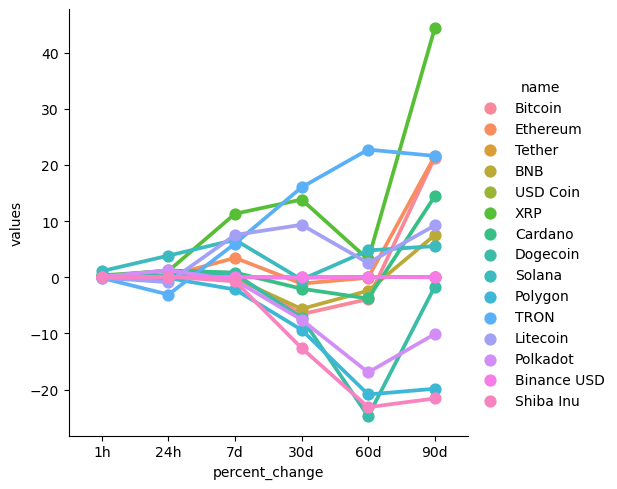

In [35]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [36]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,27247.63022,2023-06-04 13:49:30.455266


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

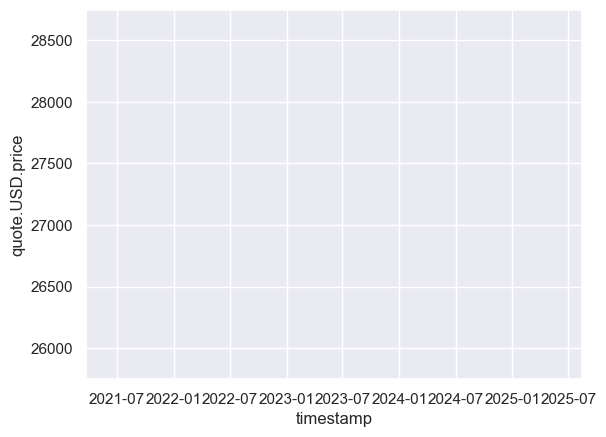

In [37]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)